# Python for Analytics
__Name__: Jide Afolabi<br>
__Date__: March 17 2024<br />
__Project__: Python<br />
__Purpose__: Perform a basic exploratory data analysis of a data set including visualizations.


### Objective
> "Exploratory data analysis (EDA) is used by data scientists to analyze and investigate data sets and summarize their main characteristics, often employing data visualization methods. It helps determine how best to manipulate data sources to get the answers you need, making it easier for data scientists to discover patterns, spot anomalies, test a hypothesis, or check assumptions.
>
> "EDA is primarily used to see what data can reveal beyond the formal modeling or hypothesis testing task and provides a provides a better understanding of data set variables and the relationships between them. It can also help determine if the statistical techniques you are considering for data analysis are appropriate. Originally developed by American mathematician John Tukey in the 1970s, EDA techniques continue to be a widely used method in the data discovery process today."

I will primarily be using a combination of NumPy, pandas, matplotlib, and seaborn to perform my EDA on a [Kaggle dataset](https://www.kaggle.com/datasets/CooperUnion/cardataset/) containing attributes about cars and their associated sales price. At the end, I will perform a linear regression using one of the variables to see how useful it is for predicting sales price.

The provided file `P5-CarData.csv` contains the car data from Kaggle just in a renamed file made available.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline  
filename = 'P5-CarData.csv'

1. I used pandas `.read_csv` function to read the `P5-CarData.csv` file into a `DataFrame` 

In [3]:
# Read the P5-CarData.csv file into a DataFrame
df = pd.read_csv(filename)
df

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


2. There are almost 12,000 rows and 16 columns of data in this file. I then used the DataFrame method `.info()` to learn more details about the columns in the dataset.

In [4]:
# Show columns in the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

3. There are some columns here that probably aren't going to prove useful for my intended analysis, so I dropped them to make my DataFrame more manageable. The columns dropped are: `'Engine Fuel Type', 'Market Category', 'Vehicle Style', 'Number of Doors', 'Vehicle Size'`. 

In [5]:
# Drop columns that is insignijficant
df.drop(['Engine Fuel Type', 'Market Category', 'Vehicle Style', 'Number of Doors', 'Vehicle Size'], axis=1, inplace=True)
df.head()

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,3916,34500


4. Renamed some of the columns to make them easier to work with. Used the DataFrame `.rename` method to change `Engine HP` to
`HP`, `Engine Cylinders` to `Cylinders`, `Transmission Type` to `Transmission`, `highway MPG` to `MPG_H`, and `city mpg` to `MPG_C`. Evaluated the `.head()` of the DataFrame to see that the column names changed.

In [6]:
# Rename some of the columns to make them easier to work with
df.rename(columns={'Engine HP': 'HP', 'Engine Cylinders': 'Cylinders', 'Transmission Type': 'Transmission', 'highway MPG': 'MPG_H', 'city mpg': 'MPG_C'}, inplace=True)
df.head()

,Make,Model,Year,HP,Cylinders,Transmission,Driven_Wheels,MPG_H,MPG_C,Popularity,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,3916,34500


5. Checked if the data includes any duplicate rows that should be removed. Used the DataFrame `.duplicated` method find the duplicate rows. Count (or sum) the number of duplicate rows and printed the result.

In [7]:
# See if the data includes any duplicate rows
df_dup = df.duplicated().sum()
print(f'Number of duplicated rows are: {df_dup}')

Number of duplicated rows are: 989


6. Removed those duplicate rows from the DataFrame using the `.drop_duplicates()` method. Used the DataFrame's `shape` attribute to confirm how many rows and columns now remain.

In [8]:
# Remove the duplicate rows from the DataFrame 
df.drop_duplicates(inplace=True)
df.shape

(10925, 11)

7. Next, I find any missing data in the columns. Using the DataFrame `isna` and `sum` methods together (as in `.isna().sum()`) to count how many missing data points exist for each column and print the result.

In [9]:
# Find any missing data in the columns.
missing_data = df.isna().sum()
print(missing_data)

Make              0
Model             0
Year              0
HP               69
Cylinders        30
Transmission      0
Driven_Wheels     0
MPG_H             0
MPG_C             0
Popularity        0
MSRP              0
dtype: int64


8. Here, the missing data for `Cylinders` likely reflects that some cars don't have engines with cylinders at all (such as electric vehicles). For this column, replacing the missing data with zeros is appropriate. I then used the `.fillna` method of the `DataFrame` to fill those missing values in the `Cylinders` column with zeros.

In [10]:
# Replace missing values in the Cylinders column with zeros
df['Cylinders'].fillna(0, inplace=True)
df['Cylinders'].isna().sum()

0

9. For `HP`, however, replacing the missing data with zeros would be a poor decision. Instead, I calculated the mean HP and use the `.fillna` method of the `DataFrame` to fill those missing values in the `HP` column with the mean HP. I repeated the summation of the missing data in the columns to verify that all show zero remaining missing data.

In [11]:
# Replace missing values in the HP column with the mean HP value
df['HP'].fillna(df['HP'].mean(), inplace=True)
df['HP'].isna().sum()

0

In [12]:
# Repeat the summation of the missing data in the columns to verify that all show zero remaining missing data
df.isna().sum()

Make             0
Model            0
Year             0
HP               0
Cylinders        0
Transmission     0
Driven_Wheels    0
MPG_H            0
MPG_C            0
Popularity       0
MSRP             0
dtype: int64

10. Next, I used the DataFrame `.describe` method to generate some statistical parameters and then used the results to answer the following questions below:
* The maximum horsepower (HP) in the dataset?
* The minimum city MPG in the dataset?
* The maximum highway MPG in the dataset?
* The maximum price (MSRP) in the dataset?
* Checked for any potential outliers?

In [13]:
# Use the dataframe describe method to show dataframe statistics
df.describe()

,Year,HP,Cylinders,MPG_H,MPG_C,Popularity,MSRP
count,10925.000000,10925.000000,10925.000000,10925.000000,10925.000000,10925.000000,1.092500e+04
mean,2010.917895,254.399503,5.652632,26.654737,19.770801,1563.693638,4.249660e+04
std,7.016102,109.424124,1.821309,9.031109,9.259532,1450.024333,6.205353e+04
min,1990.000000,55.000000,0.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,174.000000,4.000000,22.000000,16.000000,549.000000,2.199500e+04
50%,2015.000000,240.000000,6.000000,25.000000,18.000000,1385.000000,3.092000e+04
75%,2016.000000,303.000000,6.000000,30.000000,22.000000,2009.000000,4.330000e+04
max,2017.000000,1001.000000,16.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [14]:
# What is the maximum horsepower (HP) in the dataset?
max_hp = df['HP'].max()
print("Maximum Horsepower (HP) in the dataset:", max_hp)

# What is the minimum city MPG in the dataset?
min_mpg = df['MPG_C'].min()
print("\nMinimum Mile Per Gallon (MPG_C) in the dataset:", min_mpg)

# What is the maximum highway MPG in the dataset?
max_mpg = df['MPG_H'].max()
print("\nMaximum Mile Per Gallon (MPG_H) in the dataset:", max_mpg)

# What is the maximum price (MSRP) in the dataset?
max_msrp = df['MSRP'].max()
print("\nMaximum Price (MSRP) in the dataset:", max_msrp)
print()
# Do any of these values concern you as being potential outliers?
''' The Max value is a huge deviation from the mean for each category whcih means most 
likely some very expensive sport/luxury car with hight HP and MSRP are in the list of cars sampled '''

Maximum Horsepower (HP) in the dataset: 1001.0

Minimum Mile Per Gallon (MPG_C) in the dataset: 7

Maximum Mile Per Gallon (MPG_H) in the dataset: 354

Maximum Price (MSRP) in the dataset: 2065902



' The Max value is a huge deviation from the mean for each category whcih means most \nlikely some very expensive sport/luxury car with hight HP and MSRP are in the list of cars sampled '

11. Next, I explored the data to find outliers that we may need to remove from the dataset by using a boxplot.
    > "A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range."

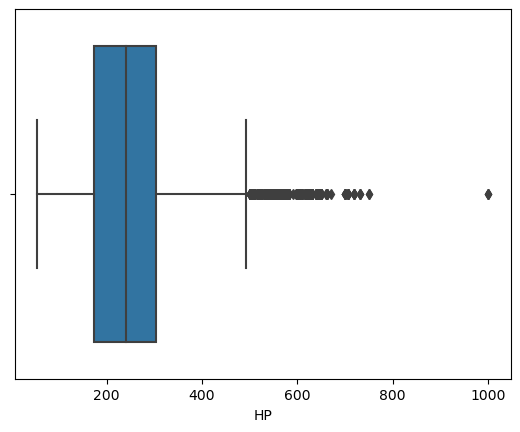

In [15]:
# Put Code Here for HP
sns.boxplot(x=df['HP']);

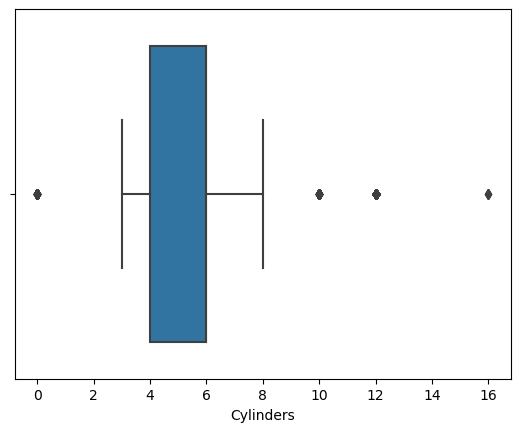

In [16]:
# Put Code Here for Cylinders
sns.boxplot(x=df['Cylinders']);

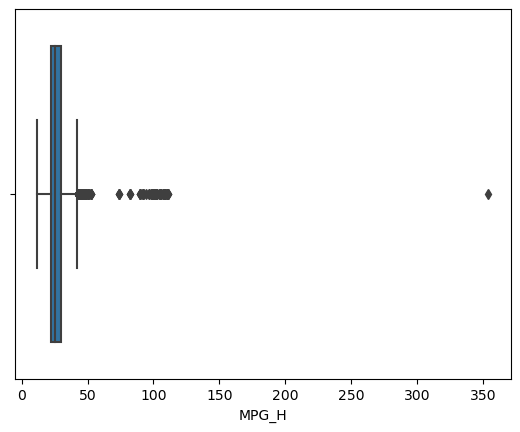

In [17]:
# Put Code Here for MPG_H
sns.boxplot(x=df['MPG_H']);

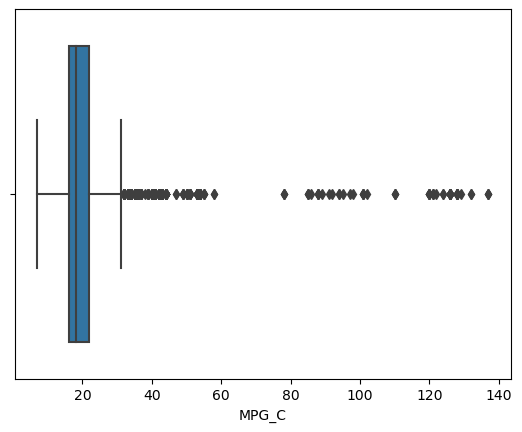

In [18]:
# Put Code Here for MPG_C
sns.boxplot(x=df['MPG_C']);

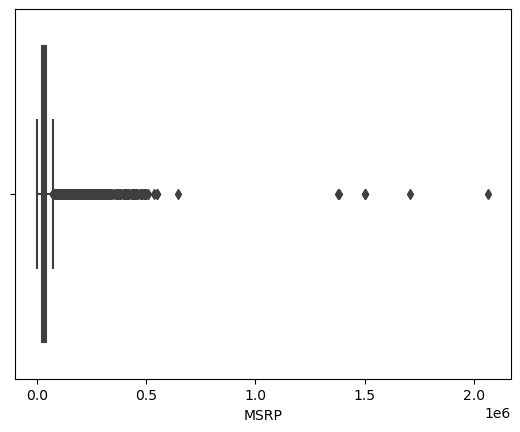

In [19]:
# Put Code Here for MSRP
sns.boxplot(x=df['MSRP']);

12. I cleaned up some of these outliers by removing (dropping) the offending rows from the DataFrame for the outliers in `HP` and `MSRP`.
 "Where to draw the line between the datapoints we wish to keep and the outliers is an important decision for which your judgment will play a critical role in determining. A commonly used approach is to drop values that are 1.5 times the inter-quartile range (Q3 - Q1) beyond the first and third quartiles. When we used `.describe` to summarize the numerical columns, the first and third quartile values were presented as the 25% and 75% values shown. 
 
 I calculated these values directly using the pandas `.quantile` method using `0.25` for Q1 and `0.75` for Q3.
```python
Q1_HP = df['HP'].quantile(0.25)
Q3_HP = df['HP'].quantile(0.75)
IQR_HP = Q3_HP - Q1_HP
```
The outliers will be less than `Q1 - 1.5*IQR` or greater than `Q3 + 1.5*IQR`. I then calculated these lower and upper cutoff values for the outliers in the `HP` and `MSRP` columns and printed the results.

In [20]:
# Calculate these lower and upper cutoff values for the outliers in the HP
Q1_HP = df['HP'].quantile(0.25)
Q3_HP = df['HP'].quantile(0.75)
IQR_HP = Q3_HP - Q1_HP
l_hp_cutoff = Q1_HP - 1.5 * IQR_HP
print(f'Lower Cut Off Value for outliers in HP; {l_hp_cutoff}')
u_hp_cutoff = Q3_HP + 1.5 * IQR_HP
print(f'Upper Cut Off Value for outliers in HP; {u_hp_cutoff}')

Lower Cut Off Value for outliers in HP; -19.5
Upper Cut Off Value for outliers in HP; 496.5


In [21]:
# Calculate these lower and upper cutoff values for the outliers in the MSRP
Q1_MSRP = df['MSRP'].quantile(0.25)
Q3_MSRP = df['MSRP'].quantile(0.75)
IQR_MSRP = Q3_MSRP - Q1_MSRP
l_msrp_cutoff = Q1_MSRP - 1.5 * IQR_MSRP
print(f'Lower Cut Off Value for outliers in MSRP; {l_msrp_cutoff}')
u_msrp_cutoff = Q3_MSRP + 1.5 * IQR_MSRP
print(f'Upper Cut Off Value for outliers in MSRP; {u_msrp_cutoff}')

Lower Cut Off Value for outliers in MSRP; -9962.5
Upper Cut Off Value for outliers in MSRP; 75257.5


13. Now that I know the values that defines the upper and lower limits for `HP` and `MSRP`, I removed all rows from the DataFrame that don't fall within these limits for these columns. Any row with an outlier value for `HP` or `MSRP` (or both) was dropped from the DataFrame.
    I then used `.describe` to display the new summary statistics for the DataFrame after the outliers have been removed. Verified that the new min and max values for `HP` and `MSRP` are within the limits identified in the previous step.


In [22]:
# Define the limits for HP and MSRP
hp_limit = (df['HP'].quantile(0.25), df['HP'].quantile(0.75))
msrp_limit = (df['MSRP'].quantile(0.25), df['MSRP'].quantile(0.75))

# Filter the DataFrame based on the limits created
df.drop(df[(df['HP'] < hp_limit[0]) | (df['HP'] > hp_limit[1]) |
            (df['MSRP'] < msrp_limit[0]) | (df['MSRP'] > msrp_limit[1])].index, inplace=True)
df.describe()

,Year,HP,Cylinders,MPG_H,MPG_C,Popularity,MSRP
count,4065.000000,4065.000000,4065.000000,4065.000000,4065.000000,4065.000000,4065.000000
mean,2012.517835,237.321963,5.292005,26.662977,19.907995,1674.941697,31673.456827
std,4.689654,40.139029,1.311142,8.296728,9.829796,1566.403216,5612.280772
min,1994.000000,174.000000,0.000000,14.000000,11.000000,26.000000,21995.000000
25%,2009.000000,200.000000,4.000000,22.000000,16.000000,549.000000,26935.000000
50%,2015.000000,240.000000,6.000000,26.000000,18.000000,1385.000000,31305.000000
75%,2016.000000,278.000000,6.000000,30.000000,22.000000,2031.000000,35975.000000
max,2017.000000,303.000000,8.000000,110.000000,132.000000,5657.000000,43300.000000


14. Created new boxplots for `HP` and `MSRP` to visualize the difference in the data with the initial outliers removed. This time around I used another method for creating the boxplots (used seaborn). Created each plot in a separate code cell below.

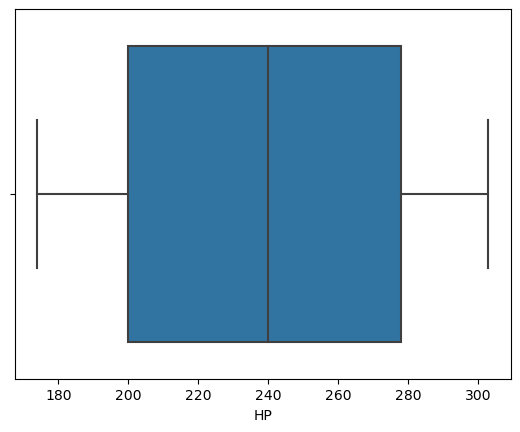

In [23]:
# Put Code Here for HP
sns.boxplot(x=df['HP']);

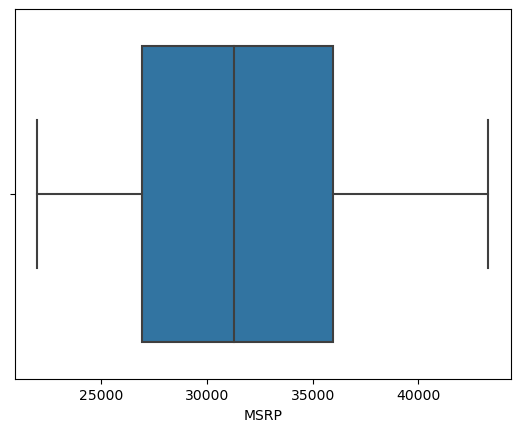

In [24]:
# Put Code Here for MSRP
sns.boxplot(x=df['MSRP']);

15. Created a bar plot that shows the count of each `Make` of car in the DataFrame to find which make of car is the most
    popular in our remaining dataset. An easy way I utilized was to create the counts of the unique `Make` values was to use the `np.unique` function with the DataFrame's `'Make'` column and the `return_counts=True` argument. This returned a tuple with the unique values and associated counts of each value respectively which I then ploted. 

Acura: 101
Audi: 82
BMW: 74
Buick: 100
Cadillac: 37
Chevrolet: 401
Chrysler: 128
Dodge: 170
FIAT: 16
Ford: 418
GMC: 261
HUMMER: 17
Honda: 278
Hyundai: 111
Infiniti: 71
Kia: 109
Land Rover: 41
Lexus: 78
Lincoln: 69
Mazda: 142
Mercedes-Benz: 49
Mitsubishi: 63
Nissan: 227
Oldsmobile: 33
Pontiac: 75
Saab: 57
Scion: 18
Subaru: 106
Suzuki: 98
Toyota: 273
Volkswagen: 261
Volvo: 101


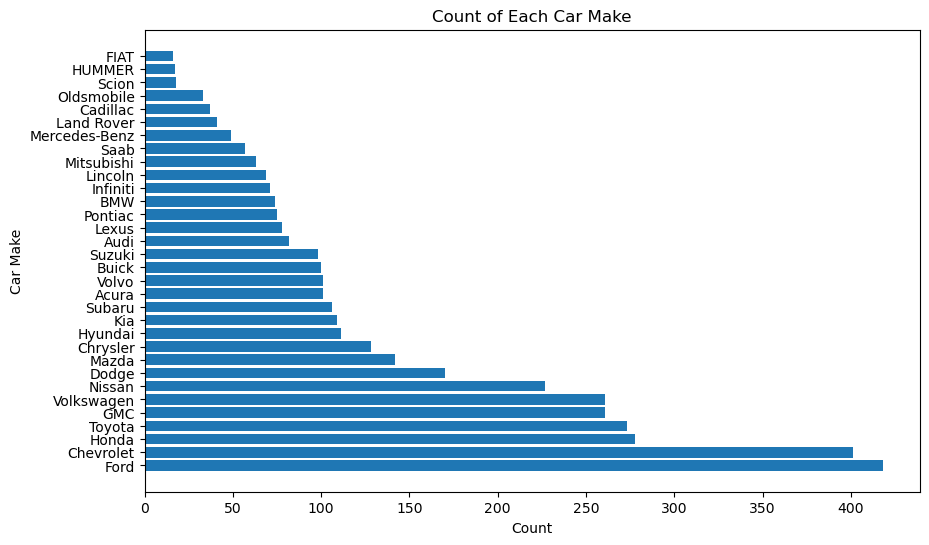

In [25]:
# Convert unique values of 'Make' column into a tuple and get the value counts of each make
make_unique = tuple(np.unique(df['Make']))

make_counts = df['Make'].value_counts()

# Print the counts of each make alongside its name
for make in make_unique:
    print(f"{make}: {make_counts[make]}")
    
# Set figure size and create a bar plot for the count of each car make
plt.figure(figsize=(10, 6))  
plt.barh(make_counts.index, make_counts.values)
plt.xlabel('Count')
plt.ylabel('Car Make')
plt.title('Count of Each Car Make')
plt.show()

16. Created a histogram that shows the `HP` distribution using seaborn's `histplot` method to create the histogram. Included the kernel density estimate in the plot by using the `kde=True` argument.

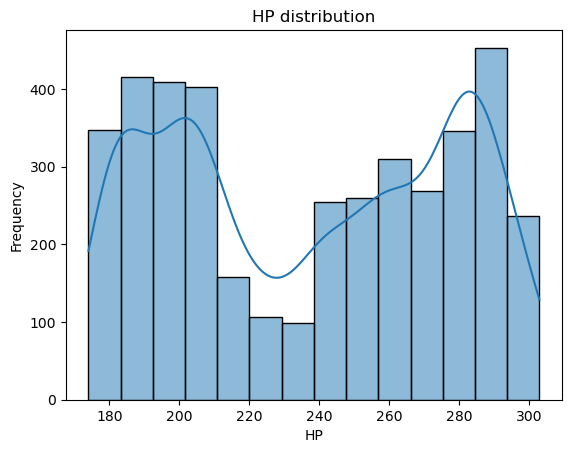

In [26]:
# Create a histogram that shows the HP distribution
sns.histplot(data=df, x='HP', bins='auto', kde=True)
plt.xlabel('HP')
plt.ylabel('Frequency')
plt.title('HP distribution')
plt.show()


17. Created a histogram that shows the `MSRP` distribution using seaborn's `histplot` method to create the histogram. Included the kernel density estimate in the plot by using the `kde=True` argument.

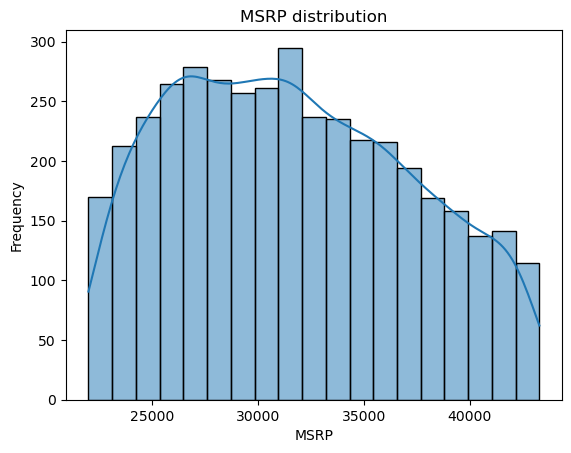

In [27]:
# Put Code Here
sns.histplot(data=df, x='MSRP', bins='auto', kde=True)
plt.xlabel('MSRP')
plt.ylabel('Frequency')
plt.title('MSRP distribution')
plt.show()

18. Finished by creating a graphical representation of all the relationships between the numeric variables in my DataFrame by using seaborn to create a `pairplot`. Included the kernel density estimate by including the `diag_kind="kde"` argument. 

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


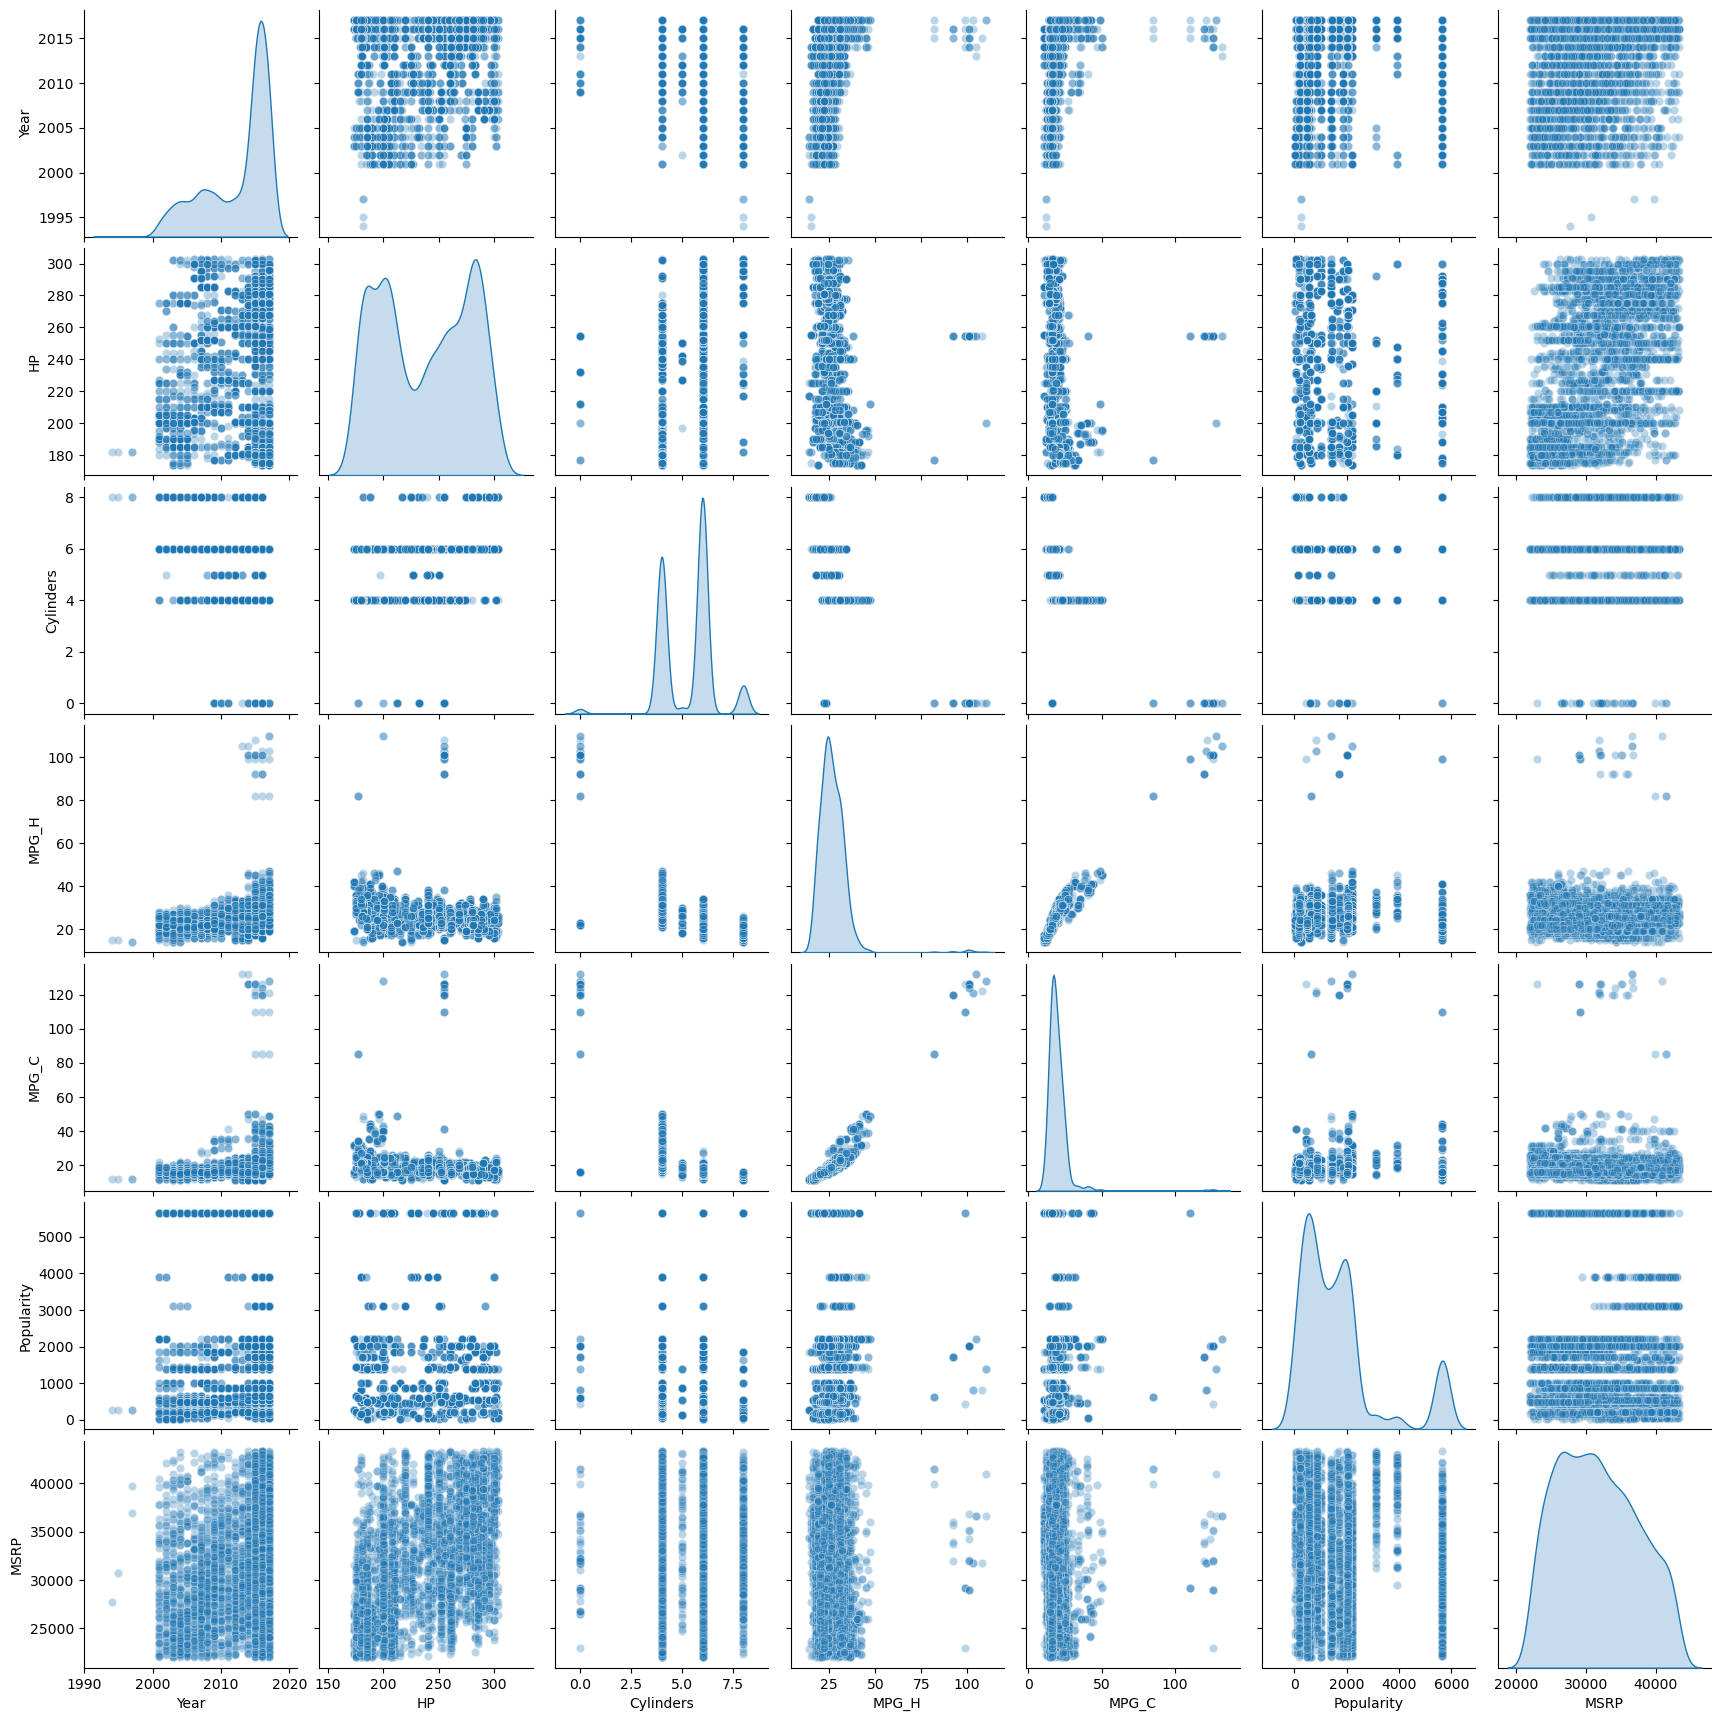

In [28]:
# Use seaborn to create a graphical representation of all the relationships between the numeric variables in df
sns.pairplot(df, diag_kind="kde", plot_kws={"alpha": 0.3});

19. From the output above, the relationship between `HP` and `MSRP` looks interesting. I then explored if a linear relationship may exist between between a car's `HP` and `MSRP` by using seaborn to create a `regplot` to visualize a linear fit. The function drew a scatterplot of two variables, `x` and `y`, and then fit the regression model `y ~ x` and plot the resulting regression line and a 95% confidence interval for that regression. I used `HP` as the `x` variable and `MSRP` as the `y` variable. My DataFrame was the `data` argument.

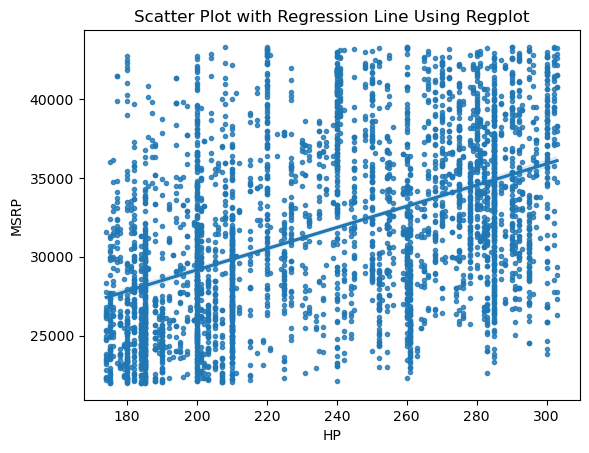

In [29]:
# Create a scatter plot with regression line using regplot
sns.regplot(x=df['HP'], y=df['MSRP'], scatter=True, marker='.')

# Add labels and title and show plot
plt.xlabel('HP')
plt.ylabel('MSRP')
plt.title('Scatter Plot with Regression Line Using Regplot')
plt.show()

20. Finally, I finished by using SciPy's `stats` module to calculate a simple linear regression using function `linregress`.  Used the DataFrame's `HP` column as `x` and the `MSRP` column as `y`. From the resulting model, I printed the R<sup>2</sup> value. Recreated the regression plot using the `linregress` approach in python:
```python
plt.plot(x, y, 'o', label='original data')
plt.plot(x, res.intercept + res.slope*x, 'r', label='fitted line')
plt.legend();
```  

R-squared: 0.231075


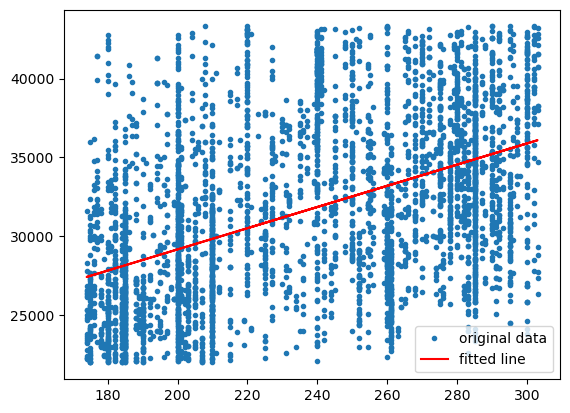

In [30]:
# Put Code Here
lin_reg = stats.linregress(df['HP'], df['MSRP'])

print(f"R-squared: {lin_reg.rvalue**2:.6f}")

plt.plot(df['HP'], df['MSRP'], '.', label='original data')
plt.plot(df['HP'], lin_reg.intercept + lin_reg.slope*df['HP'], 'r', label='fitted line')
plt.legend();

21. I explored further by improving the linear regression model by removing the remaining outliers at the low end of
the `MSRP` range. I repeated the SciPy `linregress` and plotting from the previous step, which resulted in a significantly improved R<sup>2</sup> value.

R-squared (filtered): 0.277382


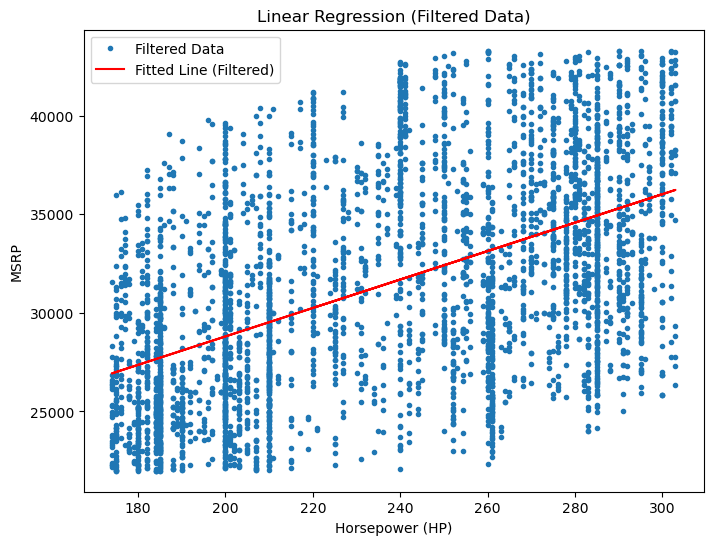

In [31]:
# Fit a linear regression model
lin_reg = stats.linregress(df['HP'], df['MSRP'])

# Calculate residuals (deviations from the fitted line)
df['Residuals'] = df['MSRP'] - (lin_reg.intercept + lin_reg.slope * df['HP'])

# Calculate IQR (Interquartile Range)
Q1 = df['Residuals'].quantile(0.25)
Q3 = df['Residuals'].quantile(0.75)
IQR = Q3 - Q1

# Define a threshold for outlier detection (adjust as needed)
outlier_threshold = 1.5 * IQR

# Identify and exclude outliers
df_filtered = df[abs(df['Residuals']) <= outlier_threshold]

# Fit a new linear regression model with filtered data
lin_reg_filtered = stats.linregress(df_filtered['HP'], df_filtered['MSRP'])

# Print R-squared value for the filtered model
print(f"R-squared (filtered): {lin_reg_filtered.rvalue**2:.6f}")

# Plot original data and fitted line (filtered)
plt.figure(figsize=(8, 6))
plt.plot(df_filtered['HP'], df_filtered['MSRP'], '.', label='Filtered Data')
plt.plot(df_filtered['HP'], lin_reg_filtered.intercept + lin_reg_filtered.slope * df_filtered['HP'], 'r', label='Fitted Line (Filtered)')
plt.xlabel('Horsepower (HP)')
plt.ylabel('MSRP')
plt.title('Linear Regression (Filtered Data)')
plt.legend()
plt.show()